
<h1>Компютерний практикум №6</h1>
Дисципліна: обробка біомедичних данних<br>
Група: БС-83<br>
Студент: Дольницький Андрій

In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as scipy
import matplotlib.pyplot as plt
import math 

In [71]:
randomNums1 = np.random.normal(loc=10, scale=10, size=50)
randomInts1 = np.round(randomNums1)

randomNums2 = np.random.normal(loc=10, scale=10, size=50)
randomInts2 = np.round(randomNums2)

data= pd.DataFrame({
    'Group 1': randomInts1,
    'Group 2': randomInts2
    })

data

,Group 1,Group 2
0,14.0,4.0
1,-8.0,11.0
2,5.0,14.0
3,17.0,-14.0
4,22.0,1.0
5,6.0,6.0
6,-1.0,9.0
7,-1.0,17.0
8,20.0,-3.0
9,9.0,16.0


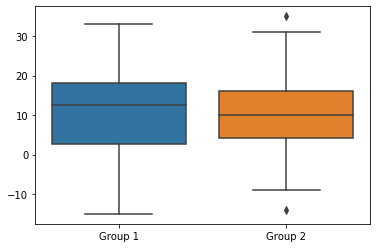

In [72]:
sns.boxplot(data=data)

In [73]:
def Pearson(a, b):

    n = len(a)
    con = (n * (a*b).sum() - a.sum()*b.sum()) / math.sqrt(\
        (n*(a**2).sum() - (a.sum())**2) *\
        (n*(a**2).sum() - (b.sum())**2))
    data = n-2
    
    pears_coef = pd.read_excel('pearson_value.xlsx', index=False)
    pears_coef.set_index("data", inplace=True)
    
    try:
        tmp = pears_coef.loc[data, 0.05]
    except KeyError:
        data = (data, pears_coef.index[abs(pears_coef.index[:-1]-data).argmin()])
        tmp = pears_coef.loc[df[1], 0.05]
    if abs(con) > tmp:
        level = "significant" 
    else:
        level="not significant"
    
    return con, data, level
    
    
Pearson(data['Group 1'], data['Group 2'])

(-0.1406998239304703, 48, 'not significant')

In [74]:
def Student(a, b):
    buff = a - b
    
    n = len(buff)
    data = n - 1
    
    m = buff.mean()
    s = buff.std()
    
    con = m / s * math.sqrt(n)
    
    stu_coef = pd.read_excel('stu.xlsx', index=False)
    stu_coef.set_index("data", inplace=True)
    
    try:
        tmp = stu_coef.loc[data, 0.05]
    except KeyError:
        data = (data, stu_coef.index[abs(stu_coef.index[:-1]-data).argmin()])
        tmp = stu_coef.loc[data, 0.05]
    
    if (tmp < abs(con)).any :
        level = "significant"
    else: 
        level ="not significant"
    
    return con, data, level
    
    
Student(data['Group 1'], data['Group 2'])

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:805: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_lowerdim(tup)


(0.49032034512229694, (49, 50), 'significant')

<h3>Висновок</h3>
Перевірка двох група на спільну залежність показала, що статистичної залежності між групами не має<br>

Перевірка за критерієм t-Стьюдента показала данні за якими була прияйнята гіпотеза про відмінність середніх
